<a href="https://colab.research.google.com/github/Ayushraj6942/GDG-Project/blob/main/Task2_Black_Scholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance numpy scipy matplotlib


[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                                                                     
2024-12-20  591.150024  591.150024  595.750000  580.909973  581.770020   
2024-12-23  594.690002  594.690002  595.299988  587.659973  590.890015   
2024-12-24  601.299988  601.299988  601.340027  595.469971  596.059998   
2024-12-26  601.340027  601.340027  602.479980  598.080017  599.500000   
2024-12-27  597.280029  597.280029  597.776001  596.429993  597.539978   

Price          Volume  
Ticker            SPY  
Date                   
2024-12-20  125716700  
2024-12-23   57635800  
2024-12-24   33160100  
2024-12-26   41219100  
2024-12-27    4249714  


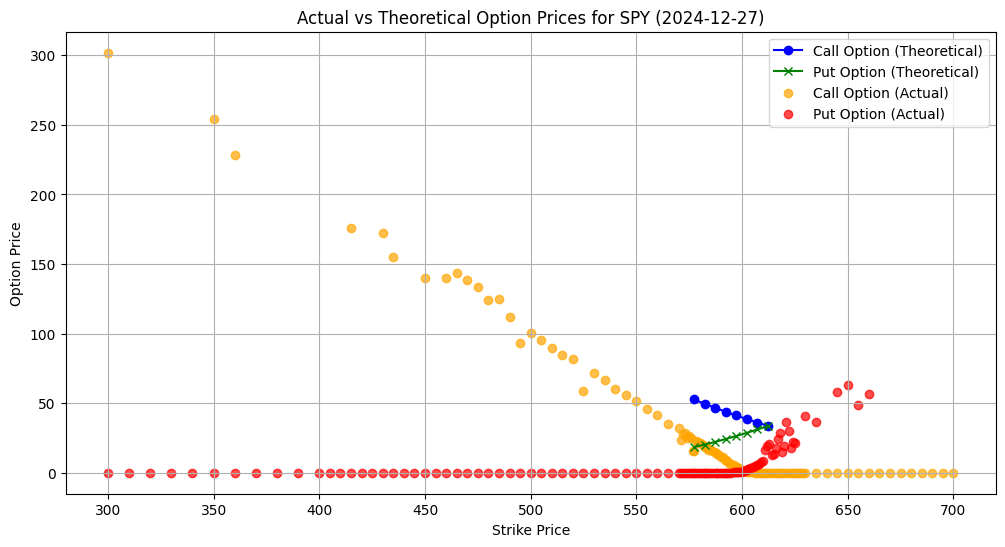


Greeks for CALL options:
Strike Price   Delta     Gamma     Vega      Theta     Rho       
577.2800292968750.6873    0.0042    149.5524  -47.8053  178.9484  
582.2800292968750.6654    0.0043    153.7865  -48.1502  173.9286  
587.2800292968750.6431    0.0044    157.5235  -48.3784  168.7375  
592.2800292968750.6206    0.0045    160.7372  -48.4873  163.3984  
597.2800292968750.5977    0.0046    163.4078  -48.4751  157.9349  
602.2800292968750.5748    0.0046    165.5214  -48.3414  152.3713  
607.2800292968750.5517    0.0047    167.0701  -48.0872  146.7316  
612.2800292968750.5287    0.0047    168.0522  -47.7144  141.0398  

Greeks for PUT options:
Strike Price   Delta     Gamma     Vega      Theta     Rho       
577.280029296875-0.3127   0.0042    149.5524  -19.6540  -102.5651 
582.280029296875-0.3346   0.0043    153.7865  -19.7550  -110.0232 
587.280029296875-0.3569   0.0044    157.5235  -19.7394  -117.6525 
592.280029296875-0.3794   0.0045    160.7372  -19.6044  -125.4299 
597.280029296

In [ ]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Black-Scholes model for Call and Put prices
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        price = (S * stats.norm.cdf(d1)) - (K * np.exp(-r * T) * stats.norm.cdf(d2))
    elif option_type == "put":
        price = (K * np.exp(-r * T) * stats.norm.cdf(-d2)) - (S * stats.norm.cdf(-d1))

    return price

# Greeks Calculation for Call and Put options
def calculate_greeks(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = stats.norm.cdf(d1) if option_type == "call" else -stats.norm.cdf(-d1)
    gamma = stats.norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * stats.norm.pdf(d1) * np.sqrt(T)
    theta = (-S * stats.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * stats.norm.cdf(d2) if option_type == "call" else (-S * stats.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * stats.norm.cdf(-d2)
    rho = K * T * np.exp(-r * T) * stats.norm.cdf(d2) if option_type == "call" else -K * T * np.exp(-r * T) * stats.norm.cdf(-d2)

    return delta, gamma, vega, theta, rho

# Fetch historical data for SPY (6 months)
ticker = "SPY"
data = yf.download(ticker, period="6mo", interval="1d")

# Display the last few rows of the fetched data
print(data.tail())

# Ensure S is a scalar value by extracting the last entry correctly
S = data['Adj Close'].iloc[-1].item()  # Current stock price (last adjusted closing price using iloc)
r = 0.05  # Risk-free rate (5%)
sigma = 0.2  # Volatility (20%)
T = 0.5  # Time to expiry in years (6 months)

# Calculate option prices using Black-Scholes model
K = np.arange(S - 20, S + 20, 5)  # Strike prices around the current stock price
call_prices = [black_scholes(S, k, T, r, sigma, option_type="call") for k in K]
put_prices = [black_scholes(S, k, T, r, sigma, option_type="put") for k in K]

# Fetch option chain for the nearest expiry
ticker_object = yf.Ticker(ticker)
expiry_dates = ticker_object.options  # All available expiry dates
nearest_expiry = expiry_dates[0]  # Select the nearest expiry date
option_chain = ticker_object.option_chain(nearest_expiry)

# Separate calls and puts
actual_calls = option_chain.calls
actual_puts = option_chain.puts

# Extract relevant columns
actual_call_prices = actual_calls[['strike', 'lastPrice']]
actual_put_prices = actual_puts[['strike', 'lastPrice']]

# Plot Theoretical vs Actual Prices
plt.figure(figsize=(12, 6))
# Theoretical Call and Put Prices
plt.plot(K, call_prices, label="Call Option (Theoretical)", marker="o", color="blue")
plt.plot(K, put_prices, label="Put Option (Theoretical)", marker="x", color="green")

# Actual Call and Put Prices
plt.scatter(actual_call_prices['strike'], actual_call_prices['lastPrice'],
            label="Call Option (Actual)", color="orange", alpha=0.7)
plt.scatter(actual_put_prices['strike'], actual_put_prices['lastPrice'],
            label="Put Option (Actual)", color="red", alpha=0.7)

# Graph settings
plt.title(f"Actual vs Theoretical Option Prices for {ticker} ({nearest_expiry})")
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()

# Function to display the Greeks (Delta, Gamma, Vega, Theta, Rho)
def display_greeks(greeks, option_type="call"):
    print(f"\nGreeks for {option_type.upper()} options:")
    print(f"{'Strike Price':<15}{'Delta':<10}{'Gamma':<10}{'Vega':<10}{'Theta':<10}{'Rho':<10}")
    for i, k in enumerate(K):
        delta, gamma, vega, theta, rho = greeks[i]
        print(f"{k:<15}{delta:<10.4f}{gamma:<10.4f}{vega:<10.4f}{theta:<10.4f}{rho:<10.4f}")

# Option Greeks for each strike price
greeks_call = [calculate_greeks(S, k, T, r, sigma, option_type="call") for k in K]
greeks_put = [calculate_greeks(S, k, T, r, sigma, option_type="put") for k in K]

# Display Call Option Greeks
display_greeks(greeks_call, option_type="call")

# Display Put Option Greeks
display_greeks(greeks_put, option_type="put")


